<a href="https://colab.research.google.com/github/Phimphakanph22/bsc_dpdm22/blob/main/Project_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import numpy as np 
import pandas as pd
import seaborn as sns

# นำข้อมูลเข้า

In [61]:
data_zoo = pd.read_csv('/content/drive/MyDrive/Project/zoo.csv')
data_zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [62]:
data_class = pd.read_csv('/content/drive/MyDrive/DPDM/Project/class.csv')
data_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


# เช็ค Missing 

In [63]:
data_zoo.isnull().any()

animal_name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
class_type     False
dtype: bool

In [64]:
data_class.isnull().any()

Class_Number                         False
Number_Of_Animal_Species_In_Class    False
Class_Type                           False
Animal_Names                         False
dtype: bool

# แบ่งข้อมูล

In [65]:
from sklearn.model_selection import train_test_split
# Load the dataset
zoo_data = data_zoo

# Separate features and labels
X = zoo_data.drop(['animal_name', 'class_type'], axis=1)
y = zoo_data['class_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  DecisionTree

In [66]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# สร้างตัวแยกประเภทของต้นไม้การตัดสินใจ
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# คาดการณ์ชุดการทดสอบและคำนวณความแม่นยำ
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# ส่งออกแผนผังการตัดสินใจเป็นไฟล์จุด
export_graphviz(clf, out_file='tree.dot', feature_names=X.columns, class_names=['1', '2', '3', '4', '5', '6', '7'])

# เห็นภาพแผนผังการตัดสินใจโดยใช้กราฟวิซ
with open('tree.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render('tree')

Accuracy: 0.9523809523809523


'tree.pdf'

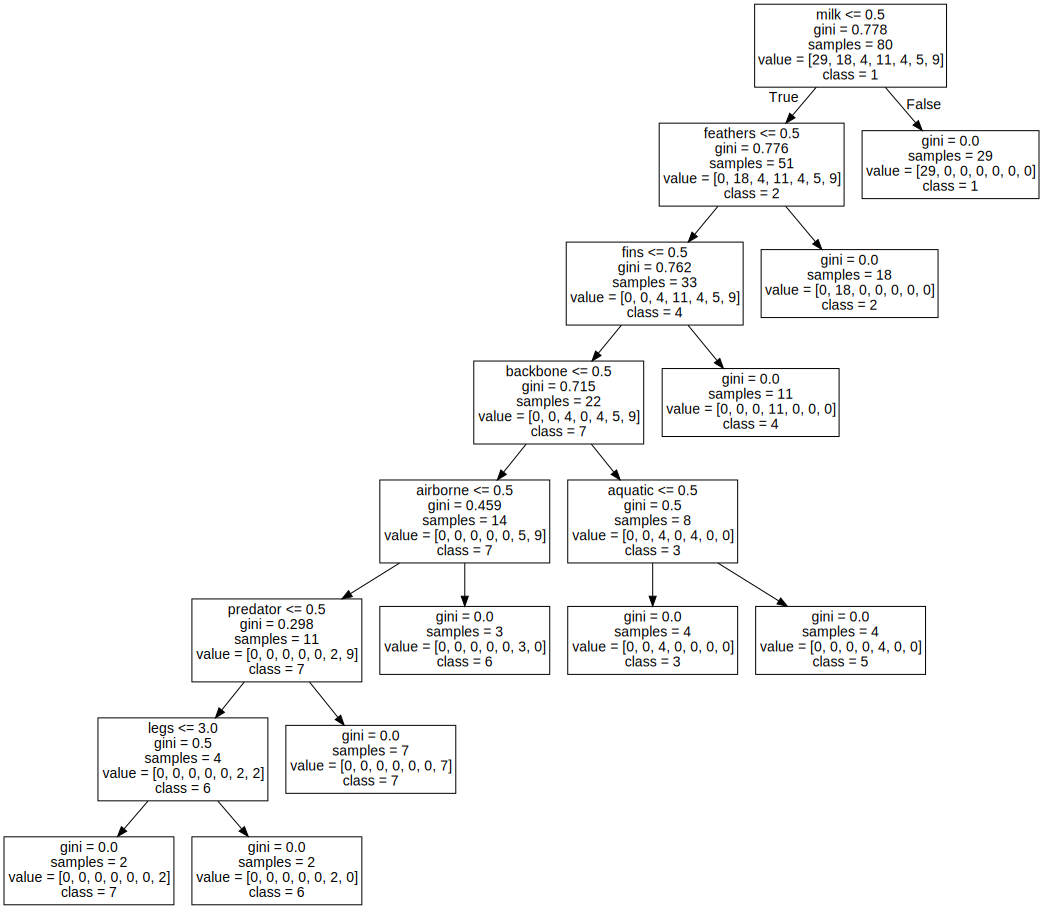

In [67]:
graph

# KNN




In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [69]:
from sklearn.model_selection import cross_val_score
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1weighted", scores.mean())

# model 2 (K=3, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3weighted", scores.mean())

# model 3 (K=5, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K5weighted", scores.mean())

# model 4 (K=1, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1NOweighted", scores.mean())

# model 5 (K=3, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3NOweighted", scores.mean())

# model 6 (K=5, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: KNOweighted", scores.mean())

Mean Cross-Validation Score: K1weighted 0.975


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Mean Cross-Validation Score: K3weighted 0.95
Mean Cross-Validation Score: K5weighted 0.9
Mean Cross-Validation Score: K1NOweighted 0.975
Mean Cross-Validation Score: K3NOweighted 0.925
Mean Cross-Validation Score: KNOweighted 0.8375


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [70]:
knn_distance1 = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn_distance1.fit(X_train,y_train)

yknn_pred1 = knn_distance1.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score

# Assume y_true and y_pred are the true and predicted labels, respectively
accuracykkn1 = accuracy_score(y_test, yknn_pred1)

# Print the accuracy score
print("แสดงว่า Model KNN นี้มีแสดงประสิทธิภาพในการจำแนกประเภทของสัตว์เท่ากับ", accuracykkn1 )

แสดงว่า Model KNN นี้มีแสดงประสิทธิภาพในการจำแนกประเภทของสัตว์เท่ากับ 1.0


In [72]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create the Naive Bayes classifier
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = nb.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.9523809523809523


#สรุปจากการคำนวณความแม่นยำของโมเดล
1.  Model DecisionTree 
   * ได้ค่า Accuracy เท่ากับ 0.9523809523809523

2. KNeighbors
   * Model ที่ดีที่สุดคือ K=1, no weighted ซึ่งมีค่า Mean Cross-Validation Score เท่ากับ 0.975
   * ได้ค่า Accuracy เท่ากับ 0.9047619047619048

3. NaiveBayes
   * ได่ค่า Accuracy เท่ากับ 0.9523809523809523

#จึงสรุปว่า
สามารถเลือกใช้โมเดล  DecisionTree หรือ NaiveBayes ได้ทั้งสองโมเดลเนื่องจากมีค่า Accuracy เท่ากัน

# Association rules เกี่ยวกับการจัดแสดงสัตว์

หากฎที่บอกว่าถ้าแสดงสัตว์ลักษณะต่างๆที่มีความสัมพันธ์กันจะมีการเข้าชมสัตว์ลักษณะอื่นๆ บ่อยขึ้น


In [73]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [74]:
dfzoo = data_zoo
dfzoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [75]:
dfzoo = pd.get_dummies(dfzoo)
dfzoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,animal_name_tuatara,animal_name_tuna,animal_name_vampire,animal_name_vole,animal_name_vulture,animal_name_wallaby,animal_name_wasp,animal_name_wolf,animal_name_worm,animal_name_wren
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
98,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [76]:
dfzoo=dfzoo.drop(columns=['legs','class_type'])

In [77]:
frequent_itemsets = apriori(dfzoo, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.425743,(hair)
1,0.198020,(feathers)
2,0.584158,(eggs)
3,0.405941,(milk)
4,0.237624,(airborne)
...,...,...
422,0.138614,"(milk, backbone, breathes, hair, tail, catsize..."
423,0.237624,"(milk, backbone, breathes, hair, tail, toothed..."
424,0.128713,"(backbone, breathes, hair, tail, toothed, cats..."
425,0.148515,"(milk, backbone, breathes, tail, toothed, cats..."


In [78]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(milk),(hair),0.405941,0.425743,0.386139,0.951220,2.234260,0.213312,11.772277
1,(hair),(milk),0.425743,0.405941,0.386139,0.906977,2.234260,0.213312,6.386139
2,(hair),(toothed),0.425743,0.603960,0.376238,0.883721,1.463210,0.119106,3.405941
3,(toothed),(hair),0.603960,0.425743,0.376238,0.622951,1.463210,0.119106,1.523031
4,(backbone),(hair),0.821782,0.425743,0.386139,0.469880,1.103670,0.036271,1.083258
...,...,...,...,...,...,...,...,...,...
7543,(breathes),"(milk, backbone, hair, tail, toothed, catsize,...",0.792079,0.128713,0.128713,0.162500,1.262500,0.026762,1.040343
7544,(hair),"(milk, backbone, breathes, tail, toothed, cats...",0.425743,0.148515,0.128713,0.302326,2.035659,0.065484,1.220462
7545,(tail),"(milk, backbone, breathes, hair, toothed, cats...",0.742574,0.168317,0.128713,0.173333,1.029804,0.003725,1.006068
7546,(toothed),"(milk, backbone, breathes, hair, tail, catsize...",0.603960,0.138614,0.128713,0.213115,1.537471,0.044996,1.094678


In [79]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('support', ascending=False))

           antecedents                    consequents   support  confidence  \
74          (backbone)                         (tail)  0.732673    0.891566   
75              (tail)                     (backbone)  0.732673    0.986667   
70          (backbone)                     (breathes)  0.683168    0.831325   
71          (breathes)                     (backbone)  0.683168    0.862500   
63           (toothed)                     (backbone)  0.603960    1.000000   
...                ...                            ...       ...         ...   
1365            (eggs)  (backbone, breathes, aquatic)  0.108911    0.186441   
1364        (backbone)      (eggs, breathes, aquatic)  0.108911    0.132530   
1363         (aquatic)     (backbone, breathes, eggs)  0.108911    0.305556   
1362  (backbone, eggs)            (breathes, aquatic)  0.108911    0.261905   
625         (breathes)           (domestic, backbone)  0.108911    0.137500   

          lift  
74    1.200643  
75    1.200643  


In [80]:
rules.sort_values('support', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
74,(backbone),(tail),0.821782,0.742574,0.732673,0.891566,1.200643,0.122439,2.374037
75,(tail),(backbone),0.742574,0.821782,0.732673,0.986667,1.200643,0.122439,13.366337
70,(backbone),(breathes),0.821782,0.792079,0.683168,0.831325,1.049548,0.032252,1.232673
71,(breathes),(backbone),0.792079,0.821782,0.683168,0.862500,1.049548,0.032252,1.296130
63,(toothed),(backbone),0.603960,0.821782,0.603960,1.000000,1.216867,0.107637,inf


สรุปการจัดแสดงสัตว์
* ควรที่เลือกสัตว์ที่มีลักษณะ หาง แสดงรวมกับลักษณะสัตว์ที่มีกระดูกสันหลัง 
   * มีค่าความถี่ของความสัมพันธ์อยู่ที่ 73.26% และมีค่า lift อยู่ที่ 1.20 คือ ลักษณะทั้งสองมีความสัมพันธ์กัน
* ควรที่เลือกสัตว์ที่มีลักษณะกระดูกสันหลัง แสดงรวมกับลักษณะสัตว์ที่มีการใช้จมูกหายใจ
   * มีค่าความถี่ของความสัมพันธ์อยู่ที่ 68.31% และมีค่า lift อยู่ที่ 1.04 คือ ลักษณะทั้งสองมีความสัมพันธ์กัน


# K-means

* เพื่อจัดกลุ่มสัตว์โดยพิจารณาจากลักษณะทั้ง 16 ชนิด เพื่อหาจำนวนกลุ่มที่เหมาะสม

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [139]:
data_zoo3 = data_zoo
data_zoo3

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [140]:
data_zoo3=data_zoo3.drop(columns=['animal_name','class_type'])

In [141]:
X=data_zoo3.iloc[:,:]
print(X)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

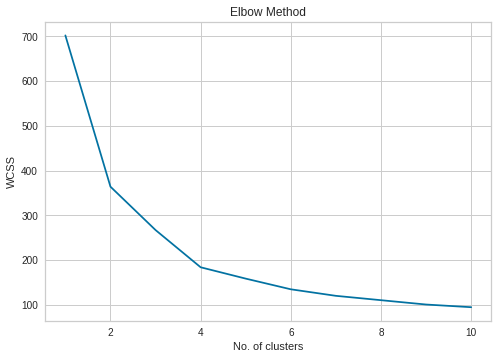

In [142]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

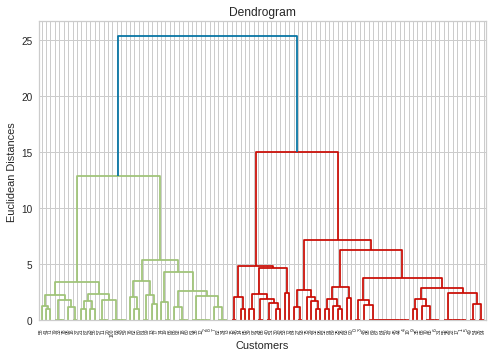

In [143]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

## ทั้ง 2 วิธีการ Elbow Method และ Hierarchical Clustering แสดงให้เห็นว่า K=4 

In [144]:
clf_final=KMeans(n_clusters=4,init='k-means++',random_state=42)
clf_final.fit(X)

KMeans(n_clusters=4, random_state=42)

In [145]:
# ทำนายกลุ่มข้อมูล
data_zoo3["Clusters"]=clf_final.predict(X)

# Summary of Clusters  เเสดงเเค่ Top - 5
cluster_summary=pd.concat([data_zoo3[data_zoo3["Clusters"]==3].head(5),data_zoo3[data_zoo3["Clusters"]==2].head(5),data_zoo3[data_zoo3["Clusters"]==1].head(5),data_zoo3[data_zoo3["Clusters"]==0].head(5)])
cluster_summary

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Clusters
11,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,3
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,3
20,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,3
21,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,3
23,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,3
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,2
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,2
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,2
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,2
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,2


In [146]:
cluster_summary.style.background_gradient(cmap='Blues').format("{:.2f}") 

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Clusters
11,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,1.00,1.00,0.00,3.00
16,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,2.00,1.00,0.00,0.00,3.00
20,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,1.00,1.00,0.00,3.00
21,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,1.00,0.00,0.00,3.00
23,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,1.00,0.00,1.00,3.00
0,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,0.00,0.00,1.00,2.00
1,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,4.00,1.00,0.00,1.00,2.00
3,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,0.00,0.00,1.00,2.00
4,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,1.00,0.00,1.00,2.00
5,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,4.00,1.00,0.00,1.00,2.00


# สรุปจัดกลุ่มได้ทั้งหมด 4 กลุ่มดังนี้
* Cluster 3 = สัตว์ที่อยู่ในประเภทนี้ต้องไม่มี hair,feathers,milk,airborne,breathes,venomous,legs,catsize
* Cluster 2 = สัตว์ที่อยู่ในประเภทนี้ต้องไม่มี feathers,eggs,airborne,aquatic,venomous,fins,catsize
* Cluster 1 = สัตว์ที่อยู่ในประเภทนี้ต้องไม่มี hair,milk,toothed,venomous,fins
* Cluster 0 = สัตว์ที่อยู่ในประเภทนี้ต้องไม่มี feathers,milk,toothed,backbone,fins,tail,catsize

* ทำแบบทราบประเภท 7 ประเภท

In [147]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns

In [148]:
Zoo = data_zoo

In [149]:
cols_to_drop = ["catsize", "domestic"]
Zoo = Zoo.drop(cols_to_drop, axis=1)

# use ifelse to update values in the specified columns
Zoo['aquatic'] = np.where(Zoo['animal_name'] == 'clam', 1, Zoo['aquatic'])
Zoo['breathes'] = np.where(Zoo['animal_name'] == 'seasnake', 1, Zoo['breathes'])
Zoo['venomous'] = np.where(Zoo['animal_name'] == 'platypus', 1, Zoo['venomous'])
Zoo['legs'] = np.where(Zoo['animal_name'] == 'seal', 4, Zoo['legs'])

In [150]:

# ใช้คอลัมน์ 'class_type' เพื่อสร้างคอลัมน์ 'type'
Zoo['type'] = np.select(
    [
        Zoo['class_type'] == 1,
        Zoo['class_type'] == 2,
        Zoo['class_type'] == 3,
        Zoo['class_type'] == 4,
        Zoo['class_type'] == 5,
        Zoo['class_type'] == 6,
        Zoo['class_type'] == 7
    ],
    [
        'Mammal',
        'Bird',
        'Reptile',
        'Fish',
        'Amphibian',
        'Bug',
        'Invertebrate'
    ],
    default=''
)

In [151]:

Zoo = Zoo.assign(type = np.select(
    [Zoo.animal_name.isin(['flea', 'gnat', 'honeybee', 'housefly', 'ladybird', 'moth', 'termite', 'wasp', 'scorpion', 'slug', 'worm']),
     Zoo.animal_name.isin(['clam', 'crab', 'crayfish', 'lobster', 'octopus', 'seawasp', 'starfish'])],
    ['terrestrial_invertebrate', 'aquatic_invertebrate'], default = Zoo.type))

Zoo['class_type'] = np.select(
    [Zoo.type == 'terrestrial_invertebrate', Zoo.type == 'aquatic_invertebrate'],
    [6, 7], default = Zoo.class_type)

In [152]:

Zoo = Zoo.assign(tail = np.where(Zoo["type"]=="Fish", 0, 
                     np.where(Zoo["animal_name"]=="Aardvaark", 1, 
                              np.where(Zoo["animal_name"]=="bear", 1, 
                                       np.where(Zoo["animal_name"]=="seal", 1, 
                                                Zoo["tail"].astype(int))))))

In [153]:

Zoo = Zoo.assign(legs=np.where(Zoo["animal_name"]=="wallaby", 4,
                np.where(Zoo["animal_name"]=="sealion", 4,
                np.where(Zoo["animal_name"]=="crab", 10,
                np.where(Zoo["animal_name"]=="crayfish", 10,
                np.where(Zoo["animal_name"]=="lobster", 10,
                Zoo["legs"].astype(float))))))
                )
     

In [154]:
Zoo = Zoo.groupby('animal_name').apply(lambda x: x.assign(animal_name = x['animal_name'] + x.groupby('animal_name').cumcount().add(1).astype(str)) if len(x)>1 else x.assign(animal_name = x['animal_name'])).reset_index(drop=True)
Zoo['animal'] = Zoo['type'] + "_" + Zoo['animal_name']

In [155]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns only
Zoo_numeric = Zoo.select_dtypes(include=['int64', 'float64'])

# Scale the data
scaler = StandardScaler()
Zoo_scaled = scaler.fit_transform(Zoo_numeric)

# Perform PCA
pca = PCA()
Zoo_pca = pca.fit_transform(Zoo_scaled)
     

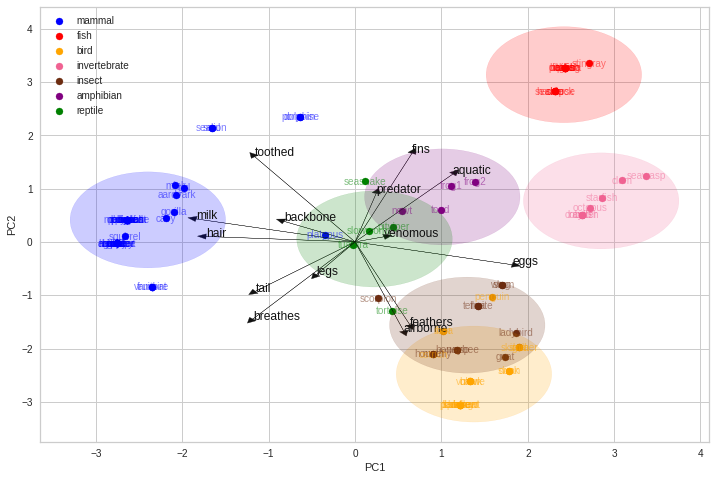

In [156]:
import matplotlib.pyplot as plt
# Load data
zoo = Zoo
zoo["type"] = zoo["class_type"].apply(lambda x: "mammal" if x == 1 else "bird" if x == 2 else "reptile" if x == 3 else "fish" if x == 4 else "amphibian" if x == 5 else "insect" if x == 6 else "invertebrate")
zoo["animal"] = pd.factorize(zoo["animal_name"])[0]

# Separate features and target
X = zoo.drop(["animal_name", "class_type", "type", "animal"], axis=1)
y = zoo["type"]

# Scale features
X_scaled = (X - X.mean()) / X.std()

# Perform PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
type_colors = {"mammal": "blue", "bird": "orange", "reptile": "green", "fish": "red", "amphibian": "purple", "insect": "#6c2c10", "invertebrate": "#f06292"}

# Create biplot
fig, ax = plt.subplots(figsize=(12, 8))
for i, animal_type in enumerate(y.unique()):
    ax.scatter(X_pca[y == animal_type, 0], X_pca[y == animal_type, 1], label=animal_type, color=type_colors[animal_type])

for i, feature in enumerate(X.columns):
    ax.arrow(0, 0, pca.components_[0, i] * 4.15, pca.components_[1, i]* 4.10, head_width=0.1, head_length=0.1, color="k")
    ax.text(pca.components_[0, i] * 4.15, pca.components_[1, i] * 4.15, feature, color="k")

for i, animal in enumerate(zoo["animal_name"]):
    animal_type = y[i]
    ax.text(X_pca[i, 0], X_pca[i, 1], animal, ha="center", va="center", fontsize=10, color=type_colors[animal_type], alpha=0.5)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend()

# Calculate mean PCA scores of each group
pca_df = pd.DataFrame({"PC1": X_pca[:, 0], "PC2": X_pca[:, 1], "Type": y})
mean_pca = pca_df.groupby("Type").mean()

# Plot group circles
for i, animal_type in enumerate(y.unique()):
    circle = plt.Circle((mean_pca.loc[animal_type, "PC1"], mean_pca.loc[animal_type, "PC2"]), radius=0.9, color=type_colors[animal_type], alpha=0.2)
    ax.add_patch(circle)

plt.show()

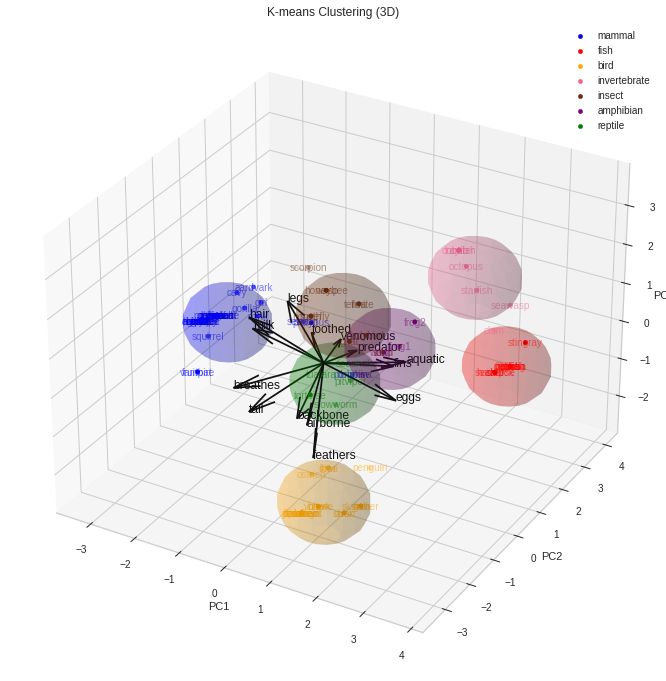

In [157]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')
X = zoo.drop(["animal_name", "class_type", "type", "animal"], axis=1)
y = zoo["type"]
X_scaled = (X - X.mean()) / X.std()

for i, animal_type in enumerate(y.unique()):
    ax.scatter(X_pca[y == animal_type, 0], X_pca[y == animal_type, 1], X_pca[y == animal_type, 2], label=animal_type, color=type_colors[animal_type])

for i, feature in enumerate(X.columns):
    ax.quiver(0, 0, 0, pca.components_[0, i] * 4.15, pca.components_[1, i]* 4.10, pca.components_[2, i]* 3.50, length=1.0,color="k")
    ax.text(pca.components_[0, i] * 4.15, pca.components_[1, i] * 4.15, pca.components_[2, i] * 3.50, feature, color="k")

for i, animal in enumerate(zoo["animal_name"]):
    animal_type = y[i]
    ax.text(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], animal, ha="center", va="center", fontsize=10, color=type_colors[animal_type], alpha=0.5)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()

# Calculate mean PCA scores of each group
pca_df = pd.DataFrame({"PC1": X_pca[:, 0], "PC2": X_pca[:, 1], "PC3": X_pca[:, 2], "Type": y})
mean_pca = pca_df.groupby("Type").mean()

# Plot group spheres
for i, animal_type in enumerate(y.unique()):
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = mean_pca.loc[animal_type, "PC1"] + 0.9*np.sin(v)*np.cos(u)
    y = mean_pca.loc[animal_type, "PC2"] + 0.9*np.sin(v)*np.sin(u)
    z = mean_pca.loc[animal_type, "PC3"] + 0.9*np.cos(v)
    ax.plot_surface(x, y, z, color=type_colors[animal_type], alpha=0.2)

plt.title('K-means Clustering (3D)');
plt.show()

ประโยชน์
* จำเเนกประเภทของสัตว์เเต่ละชนิดด้วยตัวแปรต่างๆ ทำนายให้รู้ว่าลักษณะดังกล่าวคือสัตว์ประเภทไหน เพื่อง่ายต่อการเเยกประเภทของสัตว์ในสวนสัตว์
* สามารถจัดแสดงโชว์ของสัตว์ได้ โดยใช้สัตว์ประเภทเดียวกันแสดงโชว์ด้วยกัน
* ทำให้ทราบถึงลักษณะโครงสร้างของสิ่งมีชีวิตที่ต่างกันและคล้ายคลึงกัน